# **Comparison of skin friction Cf for the new solver**

## Relaxation factor of nuEff (0.3 and 0.5) only with Newton's method

The face correction is executed from 51 iteration step (count >= 50).

1. Original wall function
2. Only wall correction
3. 0.3 relaxation factor of nuEff
```
nuEff[oppFaceIDs[faceI]] = 0.7*nuEff_face_old[faceI] + 0.3*nuEff[oppFaceIDs[faceI]]*abs(dUdy_f_spalding[faceI])/(magGradUf[faceI] + ROOTVSMALL);
```
4. 0.5 relaxation factor of nuEff
```
nuEff[oppFaceIDs[faceI]] = 0.5*nuEff_face_old[faceI] + 0.5*nuEff[oppFaceIDs[faceI]]*abs(dUdy_f_spalding[faceI])/(magGradUf[faceI] + ROOTVSMALL);
```

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 69.4
nuInf = 1.388e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path = [run + 'turbulentFlatPlate_SA/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data = [pd.read_csv(tauw_path[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-48.3374,-0.943654,0
1,0.001458,-21.1201,-0.004816,0
2,0.002433,-16.4140,-0.000939,0
3,0.003410,-14.7323,-0.000377,0
4,0.004390,-13.8445,-0.000209,0


In [4]:
tauw_path_onlywall = [run + 'turbulentFlatPlate_wmSF_onlywall/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_onlywall = [pd.read_csv(tauw_path_onlywall[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_onlywall[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,uTau,Conv_uTau,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.000000,1.000001,0.000014,0.000014,-3.481935e+06,-3.481913e+06,6.951925,1,3.481937e+06,3.405406e+06,0.967368,0.009440,1.913472,0.018827,72.322648,72.319905
1,0.001458,0.999999,1.000000,0.000014,0.000014,-1.521458e+06,-1.521459e+06,4.595414,1,1.521458e+06,1.520783e+06,0.422719,0.000059,0.845250,0.000216,5.149157,5.154083
2,0.002433,0.999999,1.000000,0.000014,0.000014,-1.182465e+06,-1.182467e+06,4.051249,1,1.182466e+06,1.182748e+06,0.328534,0.000011,0.657146,0.000043,17.349021,17.350031
3,0.003410,0.999999,1.000000,0.000014,0.000014,-1.061357e+06,-1.061358e+06,3.838180,1,1.061357e+06,1.061417e+06,0.294885,0.000005,0.589787,0.000017,18.885801,18.886208
4,0.004390,0.999999,1.000000,0.000014,0.000014,-9.974168e+05,-9.974183e+05,3.720772,1,9.974171e+05,9.974671e+05,0.277120,0.000003,0.554254,0.000010,20.330157,20.330382


In [5]:
tauw_path_wm = [run + 'turbulentFlatPlate_wmSF_count50_correlation0.3_onlyNewton/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wm = [pd.read_csv(tauw_path_wm[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wm[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,yPlusFace,nut_face,uTau,Conv_uTau,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.000000,1.009721,0.000014,0.000014,-3.482469e+06,-3.482434e+06,0.278337,1.349260e-07,6.952458,1,3.482467e+06,3.373144e+06,0.967515,0.009490,1.904655,0.018834,72.311957,72.309018
1,0.001458,1.000042,1.000369,0.000014,0.000014,-1.521234e+06,-1.521867e+06,0.183933,5.120119e-09,4.594376,1,1.521169e+06,1.519999e+06,0.422638,0.000059,0.844952,0.000215,5.129478,5.134337
2,0.002433,1.000062,1.000053,0.000014,0.000014,-1.182421e+06,-1.182849e+06,0.162161,7.296095e-10,4.050557,1,1.182348e+06,1.182642e+06,0.328501,0.000011,0.657084,0.000043,17.357984,17.358992
3,0.003410,1.000068,1.000122,0.000014,0.000014,-1.061352e+06,-1.061714e+06,0.153635,1.692673e-09,3.837588,1,1.061279e+06,1.061283e+06,0.294863,0.000005,0.589728,0.000017,18.887809,18.888216
4,0.004390,1.000073,1.000120,0.000014,0.000014,-9.974151e+05,-9.977443e+05,0.148936,1.660235e-09,3.720203,1,9.973425e+05,9.973467e+05,0.277100,0.000003,0.554200,0.000010,20.331647,20.331873


In [6]:
tauw_path_wm2 = [run + 'turbulentFlatPlate_wmSF_count50_correlation0.5_onlyNewton/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wm2 = [pd.read_csv(tauw_path_wm2[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wm2[0].head()

,ccx,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,dUdy_sp_wall,dUdy_sp_face,yPlusFace,nut_face,uTau,Conv_uTau,magGradU_wall,magGradU_face,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face
0,0.000486,1.000000,1.022978,0.000014,0.000014,-3.483188e+06,-3.483153e+06,0.278365,3.189317e-07,6.953175,1,3.483186e+06,3.330121e+06,0.967714,0.009559,1.892901,0.018843,72.296051,72.292852
1,0.001458,1.000042,1.000861,0.000014,0.000014,-1.520937e+06,-1.521570e+06,0.183915,1.194443e-08,4.593927,1,1.520872e+06,1.518956e+06,0.422556,0.000059,0.844579,0.000213,5.101503,5.106274
2,0.002433,1.000061,1.000122,0.000014,0.000014,-1.182363e+06,-1.182792e+06,0.162157,1.690903e-09,4.050458,1,1.182290e+06,1.182503e+06,0.328485,0.000011,0.657029,0.000043,17.368275,17.369282
3,0.003410,1.000068,1.000284,0.000014,0.000014,-1.061347e+06,-1.061709e+06,0.153635,3.946884e-09,3.837579,1,1.061273e+06,1.061105e+06,0.294862,0.000005,0.589677,0.000017,18.888807,18.889214
4,0.004390,1.000072,1.000279,0.000014,0.000014,-9.974135e+05,-9.977427e+05,0.148936,3.866601e-09,3.720200,1,9.973409e+05,9.971866e+05,0.277099,0.000003,0.554155,0.000010,20.331946,20.332172


In [7]:
x0 = 0
Rex = (tauw_data[0]['ccx'] - x0)*UInf/nuInf
Cf = [np.sqrt(tauw_data[i + len(res_list)*j]['tau_xx']**2 + tauw_data[i + len(res_list)*j]['tau_yy']**2 + tauw_data[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_onlywall = [tauw_data_onlywall[i + len(res_list)*j]['nuEff_wall']*tauw_data_onlywall[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wm = [tauw_data_wm[i + len(res_list)*j]['nuEff_wall']*tauw_data_wm[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]
Cf_wm2 = [tauw_data_wm2[i + len(res_list)*j]['nuEff_wall']*tauw_data_wm2[i + len(res_list)*j]['magGradU_wall']/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))]

In [8]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

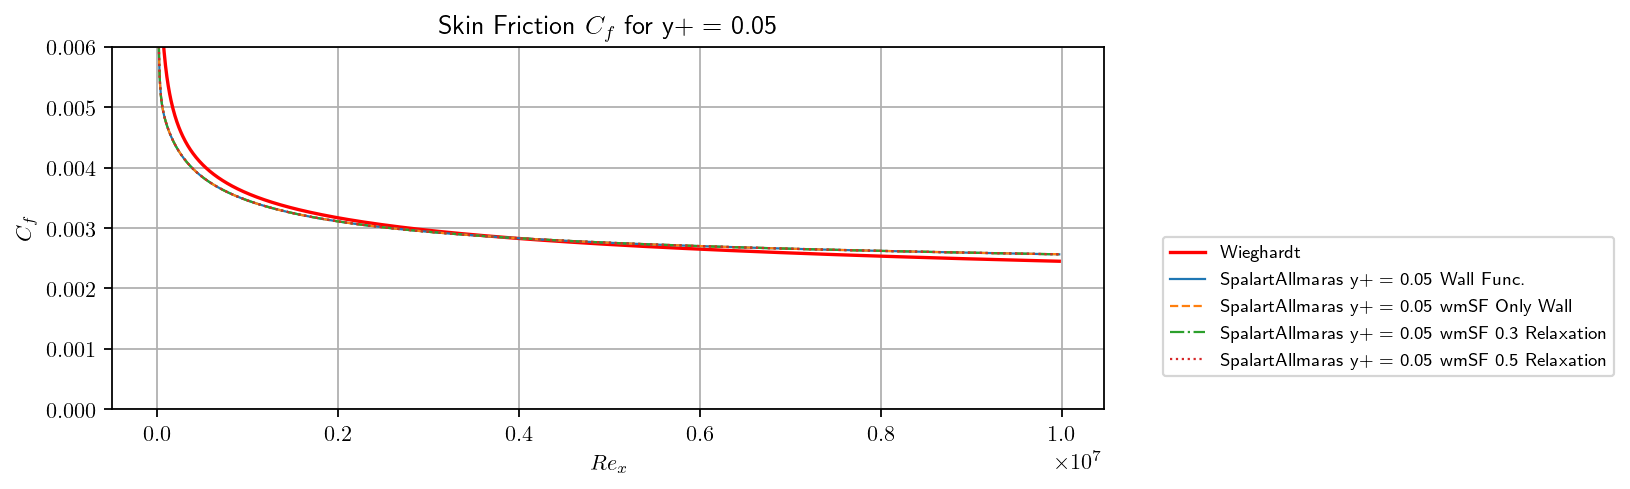

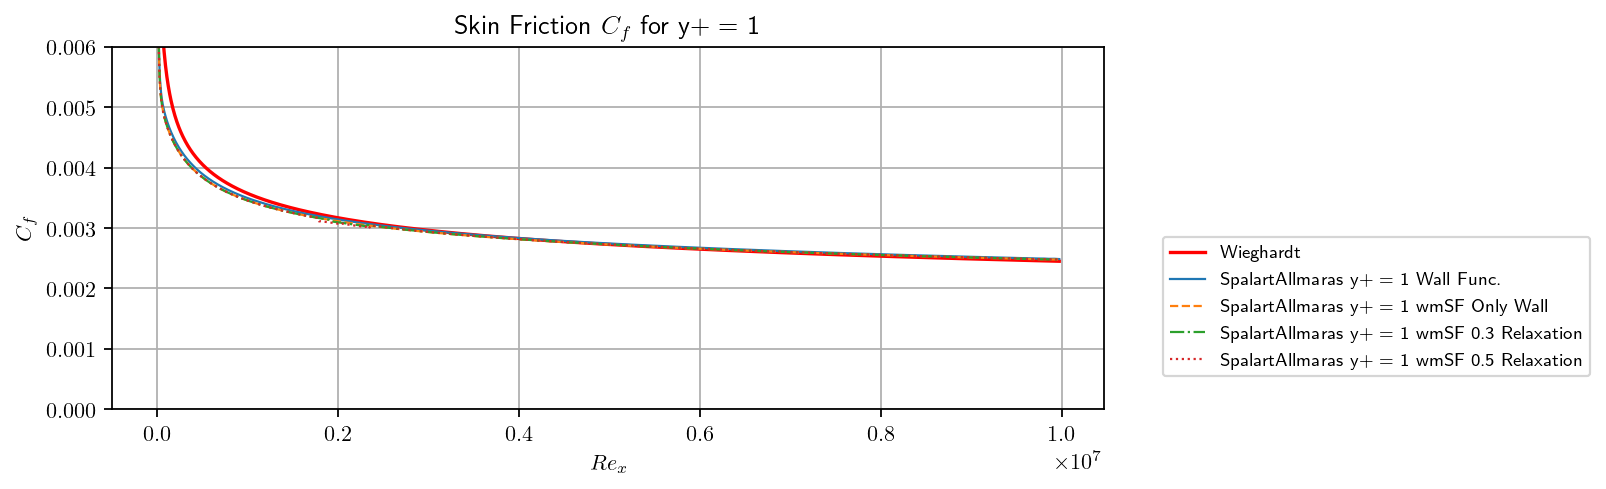

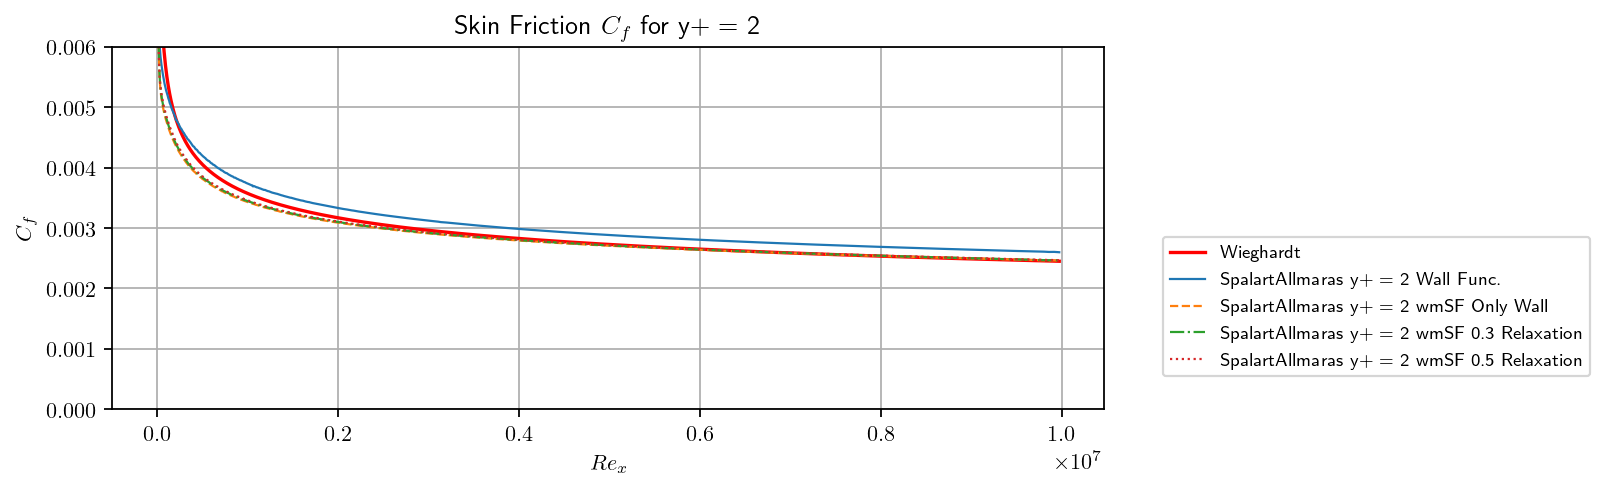

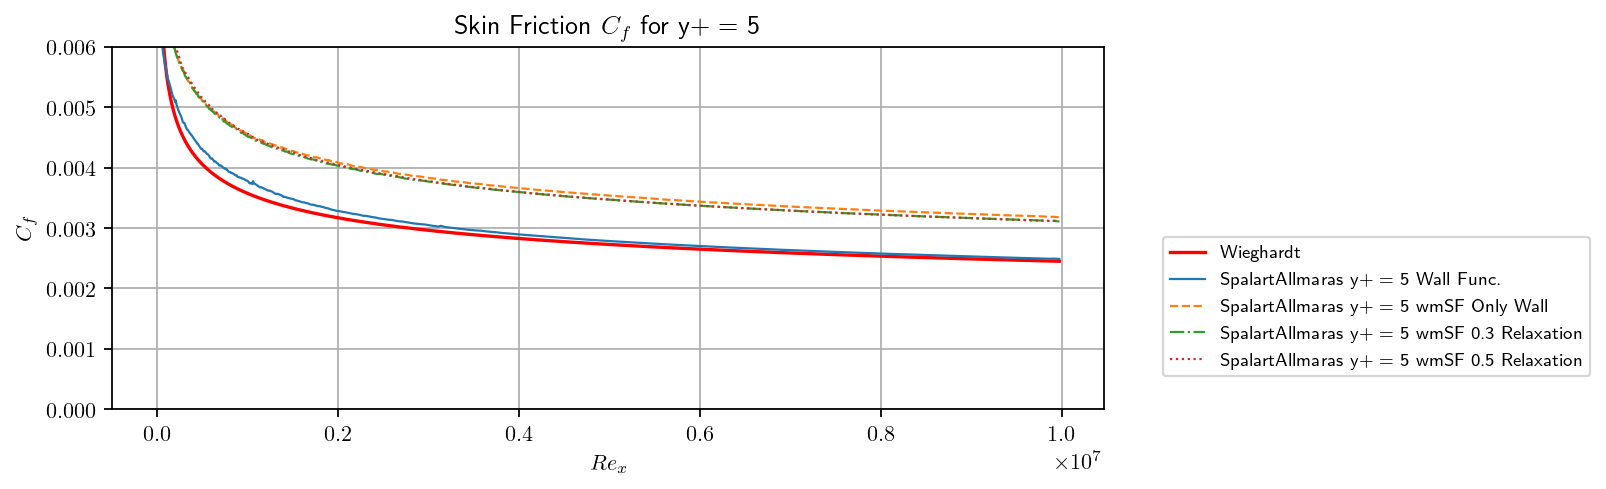

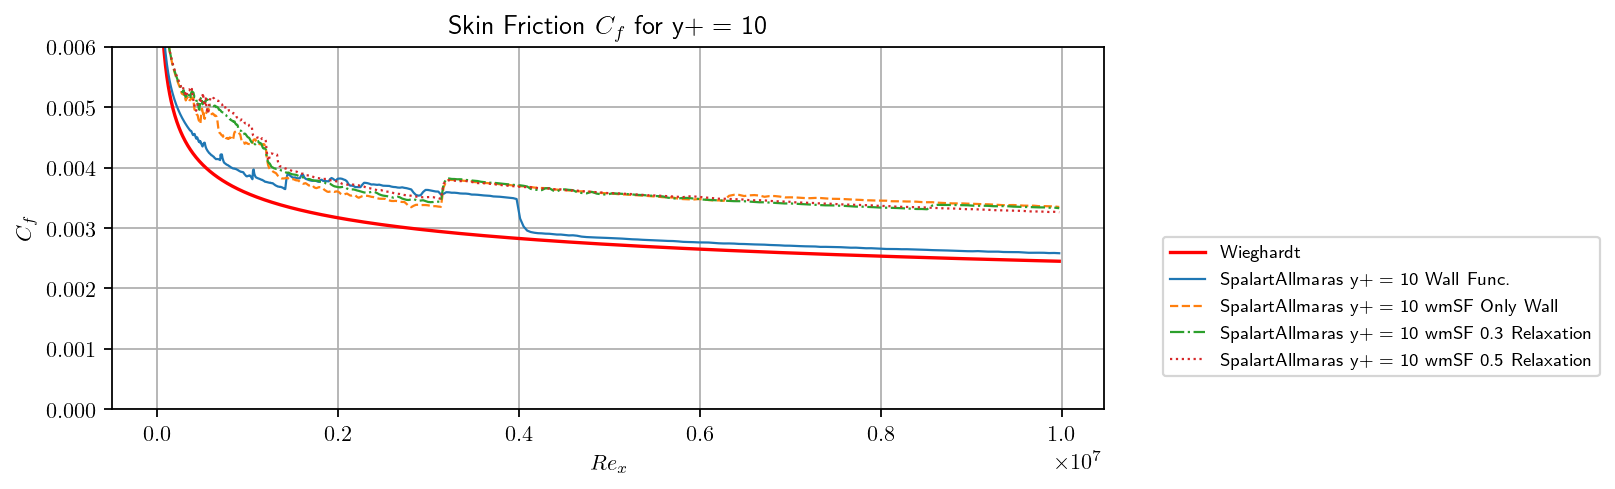

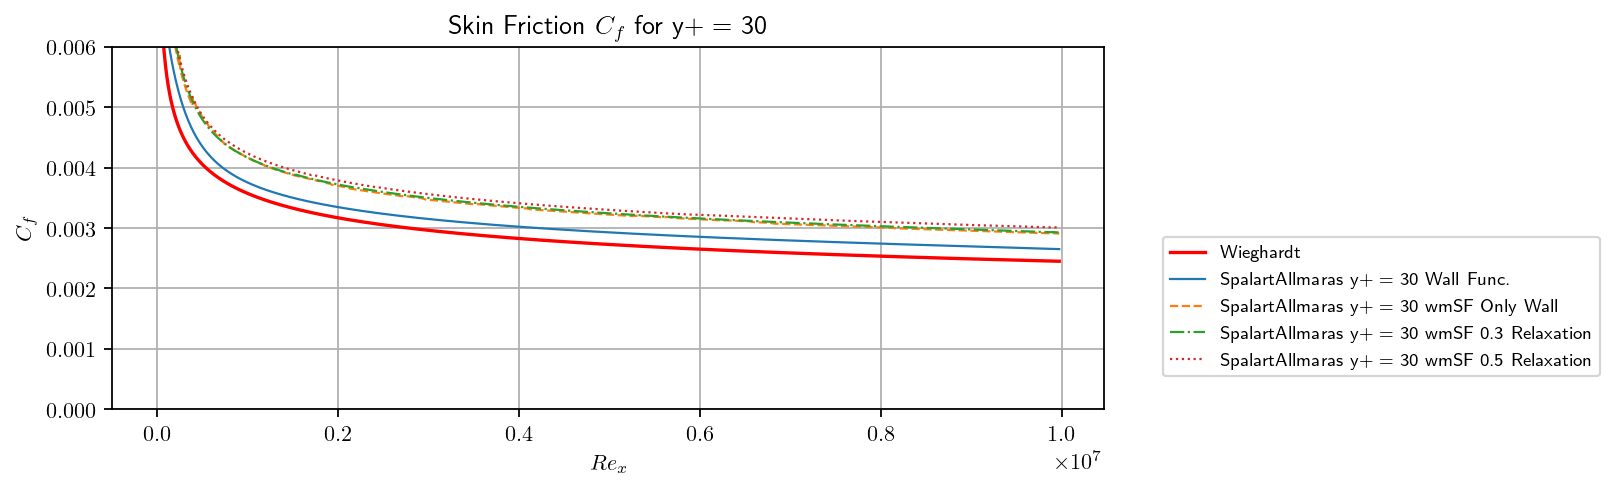

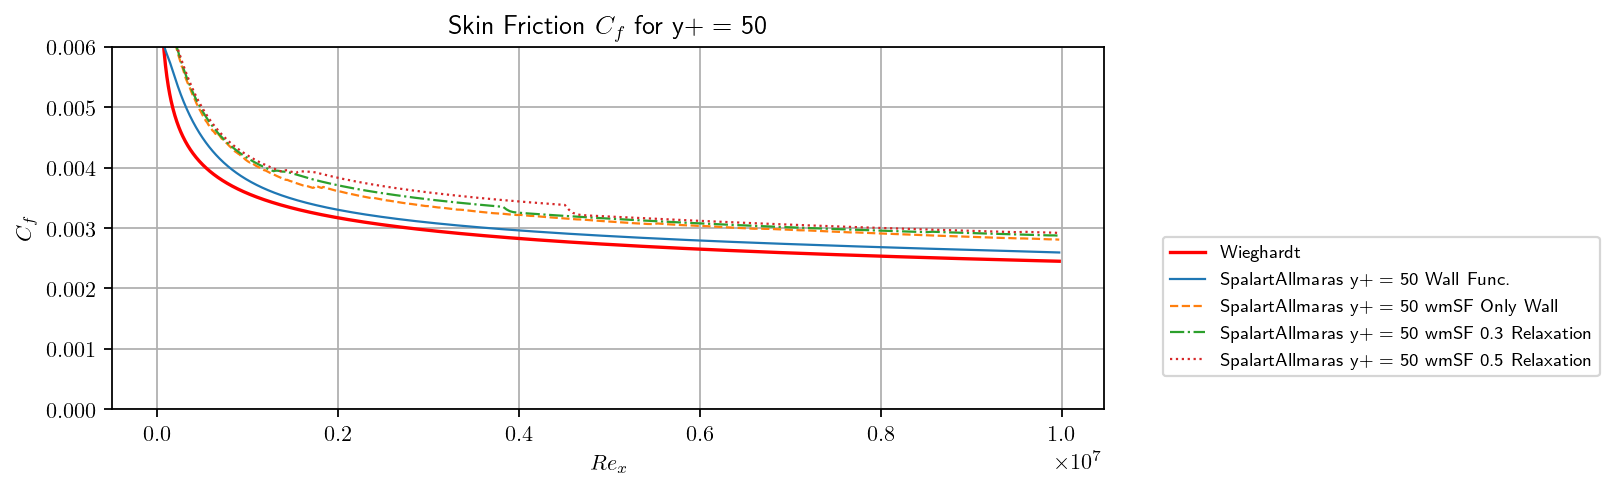

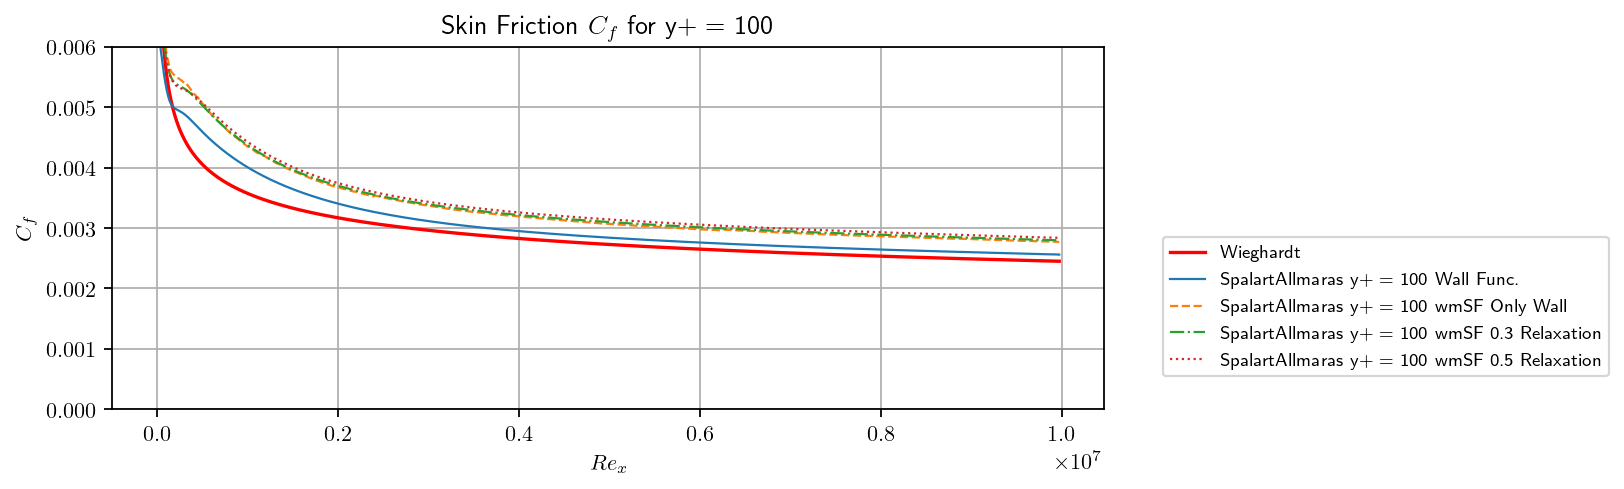

In [9]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.006])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin Friction $C_f$ for y+ = {}".format(yp[j]))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
    for i in range(len(res_list)):
        ax.plot(Rex, Cf[i + len(res_list)*j], label = "{} y+ = {} Wall Func.".format(model_sa, yp[j]), ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_onlywall[i + len(res_list)*j], label = "{} y+ = {} wmSF Only Wall".format(model_sa, yp[j]), ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_wm[i + len(res_list)*j], label = "{} y+ = {} wmSF 0.3 Relaxation".format(model_sa, yp[j]), ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)
        ax.plot(Rex, Cf_wm2[i + len(res_list)*j], label = "{} y+ = {} wmSF 0.5 Relaxation".format(model_sa, yp[j]), ls = style[i+3], c = "C{:d}".format(i+3), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.5))        